Lampiran 2. Kode Implementasi Pembuatan Model Klasifikasi dengan Metode Random Forest

## Penyiapan Data

### Menyiapkan Token API Kaggle

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

### Mengunduh Dataset

In [3]:
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 52.4MB/s]


### Extracting Data

In [4]:
!unzip crop-recommendation-dataset.zip

Archive:  crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


## Data Understanding

In [5]:
import pandas as pd

data = pd.read_csv('Crop_recommendation.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
new_label = {
    'label': {
        'rice': 'padi',
        'maize': 'jagung',
        'jute': 'rami',
        'cotton': 'kapas',
        'coconut': 'kelapa',
        'papaya': 'pepaya',
        'orange': 'jeruk',
        'apple' : 'apel',
        'muskmelon': 'melon',
        'watermelon': 'semangka',
        'grapes': 'anggur',
        'mango': 'mangga',
        'banana': 'pisang',
        'pomegranate': 'delima merah',
        'lentil': 'kacang lentil',
        'blackgram': 'gram hitam (blackgram)',
        'mungbean': 'kacang hijau',
        'pigeonpeas': 'kacang gude',
        'kidneybeans': 'kacang merah',
        'chickpea': 'kacang arab',
        'coffee': 'kopi'
    }
}

data = data.replace(new_label)
data['label'].unique()

array(['padi', 'jagung', 'kacang arab', 'kacang merah', 'kacang gude',
       'mothbeans', 'kacang hijau', 'gram hitam (blackgram)',
       'kacang lentil', 'delima merah', 'pisang', 'mangga', 'anggur',
       'semangka', 'melon', 'apel', 'jeruk', 'pepaya', 'kelapa', 'kapas',
       'rami', 'kopi'], dtype=object)

<Axes: >

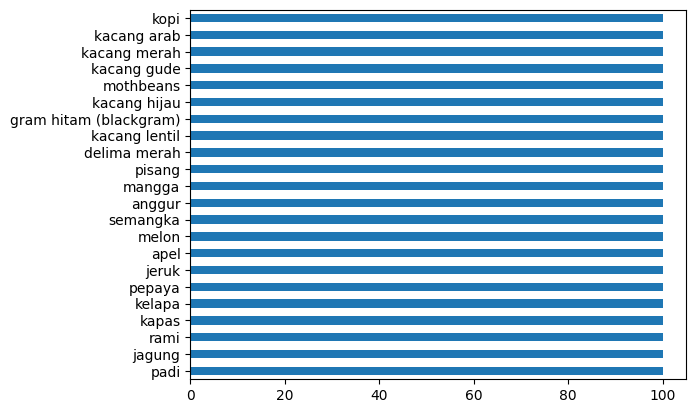

In [9]:
pd.value_counts(data['label']).plot(kind='barh')

## Data Preprocessing

### Label Encoding

In [10]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])

In [11]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,17
1,85,58,41,21.770462,80.319644,7.038096,226.655537,17
2,60,55,44,23.004459,82.320763,7.840207,263.964248,17
3,74,35,40,26.491096,80.158363,6.980401,242.864034,17
4,78,42,42,20.130175,81.604873,7.628473,262.717340,17
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,13
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,13
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,13
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,13


In [12]:
encoder.classes_

array(['anggur', 'apel', 'delima merah', 'gram hitam (blackgram)',
       'jagung', 'jeruk', 'kacang arab', 'kacang gude', 'kacang hijau',
       'kacang lentil', 'kacang merah', 'kapas', 'kelapa', 'kopi',
       'mangga', 'melon', 'mothbeans', 'padi', 'pepaya', 'pisang', 'rami',
       'semangka'], dtype=object)

In [13]:
pd.DataFrame(data={"Before":encoder.classes_ ,"After": [x for x in range(len(encoder.classes_))]})

,Before,After
0,anggur,0
1,apel,1
2,delima merah,2
3,gram hitam (blackgram),3
4,jagung,4
5,jeruk,5
6,kacang arab,6
7,kacang gude,7
8,kacang hijau,8
9,kacang lentil,9


### Data Spliting

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [15]:
print(f'Total Data           : {len(X_train) + len(X_test)}')
print(f'Jumlah Data Training : {len(X_train)}')
print(f'Jumlah Data Testing  : {len(X_test)}')

Total Data           : 2200
Jumlah Data Training : 1760
Jumlah Data Testing  : 440


## Modelling

In [16]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

def train_random_forest(n_estimators, max_depth, min_samples_leaf, kf, X_train, y_train, X_test, y_test):
    precisions, f1_scores, recall_scores, accuracy_scores = [], [], [], []
    test_precisions, test_f1_scores, test_recall_scores, test_accuracy_scores = [], [], [], []
    models = []

    for train_index, test_index in kf.split(X_train, y_train):
        X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            random_state=41,
            criterion='entropy'
        )

        model.fit(X_train_fold, y_train_fold)
        y_pred_val = model.predict(X_val)

        precisions.append(precision_score(y_val, y_pred_val, average='macro'))
        f1_scores.append(f1_score(y_val, y_pred_val, average='macro'))
        recall_scores.append(recall_score(y_val, y_pred_val, average='macro'))
        accuracy_scores.append(accuracy_score(y_val, y_pred_val))

        y_pred_test = model.predict(X_test)

        test_precisions.append(precision_score(y_test, y_pred_test, average='macro'))
        test_f1_scores.append(f1_score(y_test, y_pred_test, average='macro'))
        test_recall_scores.append(recall_score(y_test, y_pred_test, average='macro'))
        test_accuracy_scores.append(accuracy_score(y_test, y_pred_test))

        models.append(model)

    best_accuracy = max(test_accuracy_scores)
    best_fold = test_accuracy_scores.index(best_accuracy)

    return {
        'n_estimators': n_estimators,
        'max_depth': 'None' if max_depth is None else max_depth,
        'min_samples_leaf': 'None' if min_samples_leaf is None else min_samples_leaf,
        'precision': precisions,
        'f1_score': f1_scores,
        'recall_score': recall_scores,
        'accuracy_score': accuracy_scores,
        'test_precision': test_precisions,
        'test_f1_score': test_f1_scores,
        'test_recall_score': test_recall_scores,
        'test_accuracy_score': test_accuracy_scores,
        'best_accuracy': best_accuracy,
        'best_fold': best_fold,
        'best_model': models[best_fold]
    }

In [18]:
def collect_result(df, model):
    new_data = {
        'n_estimators': [model['n_estimators']] * 5,
        'max_depth': [model['max_depth']] * 5,
        'min_samples_leaf': [model['min_samples_leaf']] * 5,
        'Fold': [1, 2, 3, 4, 5],
        'Accuracy': model['accuracy_score'],
        'Precision': model['precision'],
        'Recall score': model['recall_score'],
        'F1 score': model['f1_score'],
        'Test Accuracy': model['test_accuracy_score'],
        'Test Precision': model['test_precision'],
        'Test Recall score': model['test_recall_score'],
        'Test F1 score': model['test_f1_score'],
    }

    new_df = pd.DataFrame(data=new_data)
    df = pd.concat([df, new_df], ignore_index=True)

    return df

In [19]:
def random_forest_trainer(skenario, kf, X_train, y_train, X_test, y_test):
    best = {"best_accuracy": 0}
    res_df = pd.DataFrame(
        columns=[
            "n_estimators",
            "max_depth",
            "min_samples_leaf",
            "Fold",
            "Accuracy",
            "Precision",
            "Recall score",
            "F1 score",
            "Test Accuracy",
            "Test Precision",
            "Test Recall score",
            "Test F1 score",
        ]
    )

    for m in skenario['n_estimators']:
        for n in skenario['max_depth']:
            for o in skenario['min_samples_leaf']:
                temp_rf = train_random_forest(
                    n_estimators=m,
                    max_depth=n,
                    min_samples_leaf=o,
                    kf=kf,
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test,
                )
                best_model_accuracy = temp_rf["best_accuracy"]
                if best_model_accuracy > best["best_accuracy"]:
                    best = {
                        "best_accuracy": best_model_accuracy,
                        "best_params": {
                            "n_estimators": temp_rf["n_estimators"],
                            "max_depth": temp_rf["max_depth"],
                            "min_samples_leaf": temp_rf["min_samples_leaf"],
                        },
                        "best_model": temp_rf["best_model"],
                        "best_fold": temp_rf["best_fold"],
                    }
                res_df = collect_result(res_df, temp_rf)

    best["result_score"] = res_df
    print(
        f"Performa terbaik model adalah dengan menggunakan parameter:\n{best['best_params']}\nfold ke-{best['best_fold']+1} dengan akurasi {best['best_accuracy']}"
    )
    return best


### Training Model

In [20]:
skenario = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

RF_model = random_forest_trainer(skenario=skenario, kf=kf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Performa terbaik model adalah dengan menggunakan parameter:
{'n_estimators': 50, 'max_depth': 'None', 'min_samples_leaf': 1}
fold ke-2 dengan akurasi 0.9954545454545455


In [21]:
df_cv_result = RF_model['result_score'].sort_values(by=['Test Accuracy'], ascending=False).head(1)
df_cv_result = df_cv_result.loc[:, ['Precision', 'Recall score', 'F1 score', 'Accuracy']]
df_cv_result

,Precision,Recall score,F1 score,Accuracy
1,1.0,1.0,1.0,1.0


In [22]:
RF_model['result_score'][(RF_model['result_score']['n_estimators'] == 50) & (RF_model['result_score']['max_depth'] == 'None') & (RF_model['result_score']['min_samples_leaf'] == 1)]

,n_estimators,max_depth,min_samples_leaf,Fold,Accuracy,Precision,Recall score,F1 score,Test Accuracy,Test Precision,Test Recall score,Test F1 score
0,50,None,1,1,0.982955,0.983729,0.982932,0.982521,0.990909,0.990967,0.990929,0.990378
1,50,None,1,2,1.000000,1.000000,1.000000,1.000000,0.995455,0.996364,0.995215,0.995581
2,50,None,1,3,0.991477,0.992276,0.991477,0.991452,0.990909,0.989899,0.991345,0.990331
3,50,None,1,4,0.997159,0.997326,0.997159,0.997156,0.993182,0.992576,0.993321,0.992637
4,50,None,1,5,0.997159,0.997159,0.997159,0.997067,0.993182,0.992576,0.993321,0.992637


## Testing

In [23]:
# Menyiapkan dataframe untuk analisis performa model
test_result = pd.DataFrame(index=['Precision', 'Recall', 'F1', 'Accuracy'],
                      columns=['Testing'])

hasil_test = RF_model['best_model'].predict(X_test)

test_result.loc['Precision','Testing'] = precision_score(y_test, hasil_test, average='macro')
test_result.loc['Recall','Testing'] = recall_score(y_test, hasil_test, average='macro')
test_result.loc['F1','Testing'] = f1_score(y_test, hasil_test, average='macro')
test_result.loc['Accuracy','Testing'] = accuracy_score(y_test, hasil_test)

In [24]:
y_test = pd.Series(encoder.inverse_transform(y_test))
hasil_test = pd.Series(encoder.inverse_transform(hasil_test))

In [25]:
df_hasil_test = pd.concat(
    [X_test.reset_index(drop=True),y_test.reset_index(drop=True),hasil_test.reset_index(drop=True)],
    axis=1
    )

df_hasil_test = df_hasil_test.rename(columns={0: 'label aktual', 1:'label hasil klasifikasi'})

df_hasil_test.head(20)

,N,P,K,temperature,humidity,ph,rainfall,label aktual,label hasil klasifikasi
0,101,17,47,29.494014,94.729813,6.185053,26.308209,melon,melon
1,98,8,51,26.179346,86.522581,6.259336,49.430510,semangka,semangka
2,59,62,49,43.360515,93.351916,6.941497,114.778071,pepaya,pepaya
3,44,60,55,34.280461,90.555616,6.825371,98.540477,pepaya,pepaya
4,30,137,200,22.914300,90.704756,5.603413,118.604465,apel,apel
5,18,19,27,27.755187,52.346058,4.772386,94.112133,mangga,mangga
6,35,145,195,22.039115,94.580758,6.231950,110.980401,apel,apel
7,22,44,24,24.309351,56.329383,6.030447,58.995363,mothbeans,mothbeans
8,11,46,24,27.652802,89.806506,6.459252,56.525580,kacang hijau,kacang hijau
9,3,78,18,20.213682,68.652577,6.887130,50.897330,kacang lentil,kacang lentil


In [26]:
test_result

,Testing
Precision,0.996364
Recall,0.995215
F1,0.995581
Accuracy,0.995455


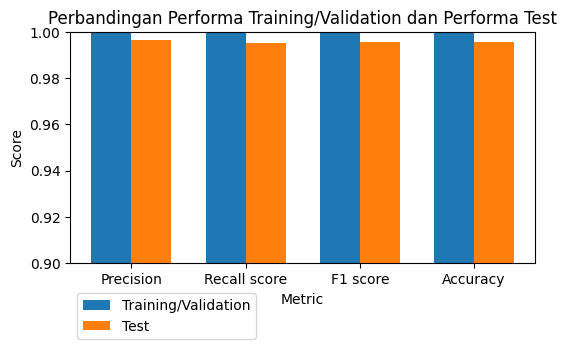

In [27]:
import numpy as np
import matplotlib.pyplot as plt

df_cv_avg = df_cv_result

fig, ax = plt.subplots(figsize=(6, 3))

bar_width = 0.35
bar_positions_train = np.arange(len(df_cv_avg.columns))
bar_positions_test = bar_positions_train + bar_width

# Plot bar untuk training/validation
ax.bar(bar_positions_train, df_cv_avg.iloc[0], width=bar_width, label='Training/Validation')

# Plot bar untuk test
ax.bar(bar_positions_test, test_result['Testing'], width=bar_width, label='Test')

# Customize the plot
ax.set_title('Perbandingan Performa Training/Validation dan Performa Test')
ax.set_ylabel('Score')
ax.set_xlabel('Metric')
ax.set_xticks(bar_positions_train + bar_width / 2)
ax.set_xticklabels(df_cv_avg.columns)
ax.legend(bbox_to_anchor=(0, -0.1), loc='upper left')
ax.set_ylim([0.9, 1])

# Show the plot
plt.show()

### Ekspor Hasil ke Excel

In [28]:
RF_model['result_score'].sort_values(by=['Test Accuracy'], ascending=False).to_excel('hasil.xlsx', index=False)

### Ekspor Model Terbaik ke Pickle

In [29]:
import pickle
pickle.dump(RF_model['best_model'], open('best_rf_model.pkl', 'wb'))